In [76]:
from fastai.tabular.all import *
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 100

In [77]:
books = pd.read_csv("books_cleaned_final.csv")

In [78]:
books.head()

,Name,Authors,Price,Image-url,Rating,NumberOfPages,Format,Publication date,Publisher,Language,ISBN10,ISBN13,Publication City,Publication Country,Width,Height,Thickness,Weight
0,An Introduction to Statistical Learning : with Applications in R,"Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani",2009.0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/lrg/9781/4614/9781461471370.jpg,4.61,426.0,Hardback,2017-09-01,Springer,English,1461471370,9781461471370,"New York, NY",United States,155.0,235.0,25.40,1014.00
1,"The Elements of Statistical Learning : Data Mining, Inference, and Prediction, Second Edition","Trevor Hastie, Robert Tibshirani, Jerome Friedman",2357.0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9780/3878/9780387848570.jpg,4.40,745.0,Hardback,2009-02-09,Springer,English,0387848576,9780387848570,"New York, NY",United States,155.0,235.0,35.56,1179.34
2,Pattern Recognition and Machine Learning,Christopher M. Bishop,3038.0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/lrg/9780/3873/9780387310732.jpg,4.30,738.0,Hardback,2011-04-06,Springer,English,0387310738,9780387310732,"New York, NY",United States,178.0,254.0,34.29,2147.00
3,Deep Learning,"Ian Goodfellow, Yoshua Bengio, Aaron Courville",2418.0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/lrg/9780/2620/9780262035613.jpg,4.44,800.0,Hardback,2017-04-18,MIT Press Ltd,English,0262035618,9780262035613,Cambridge,United States,178.0,229.0,32.00,1270.06
4,Advances in Financial Machine Learning,Marcos Lopez de Prado,1040.0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/lrg/9781/1194/9781119482086.jpg,4.21,400.0,Hardback,2018-02-21,Wiley,English,1119482089,9781119482086,New York,United States,155.0,238.0,25.00,726.00


In [79]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1914 non-null   object 
 1   Authors              1914 non-null   object 
 2   Price                1914 non-null   float64
 3   Image-url            1914 non-null   object 
 4   Rating               615 non-null    float64
 5   NumberOfPages        1902 non-null   float64
 6   Format               1914 non-null   object 
 7   Publication date     1914 non-null   object 
 8   Publisher            1914 non-null   object 
 9   Language             1907 non-null   object 
 10  ISBN10               1798 non-null   object 
 11  ISBN13               1914 non-null   int64  
 12  Publication City     982 non-null    object 
 13  Publication Country  982 non-null    object 
 14  Width                1696 non-null   float64
 15  Height               1696 non-null   f

In [80]:
books.drop(["Image-url", "Rating", "ISBN10", "ISBN13"], axis=1, inplace=True)

In [81]:
books = add_datepart(books, "Publication date")

In [82]:
books.columns

Index(['Name', 'Authors', 'Price', 'Publication Week', 'NumberOfPages',
       'Format', 'Publisher', 'Language', 'Publication City',
       'Publication Country', 'Width', 'Height', 'Thickness', 'Weight',
       'Publication Year', 'Publication Month', 'Publication Day',
       'Publication Dayofweek', 'Publication Dayofyear',
       'Publication Is_month_end', 'Publication Is_month_start',
       'Publication Is_quarter_end', 'Publication Is_quarter_start',
       'Publication Is_year_end', 'Publication Is_year_start',
       'Publication Elapsed'],
      dtype='object')

# Investigating the target variable - Price

In [83]:
books["Price"].describe()

count     1914.000000
mean      1838.880878
std       2061.328347
min        236.000000
25%        697.000000
50%       1224.500000
75%       2514.000000
max      42667.000000
Name: Price, dtype: float64

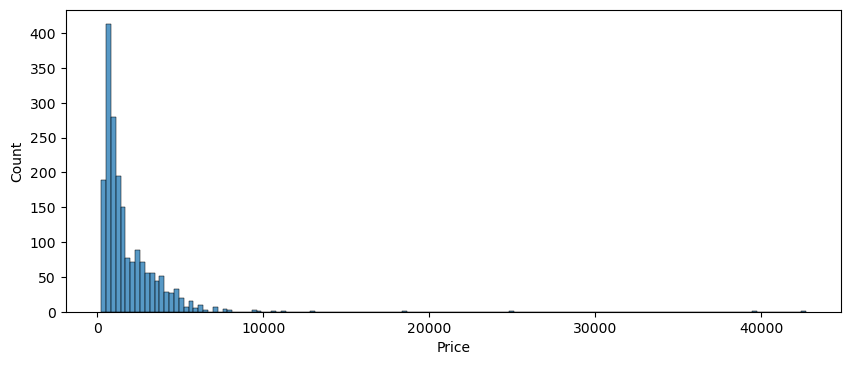

In [84]:
sns.histplot(books, x='Price');

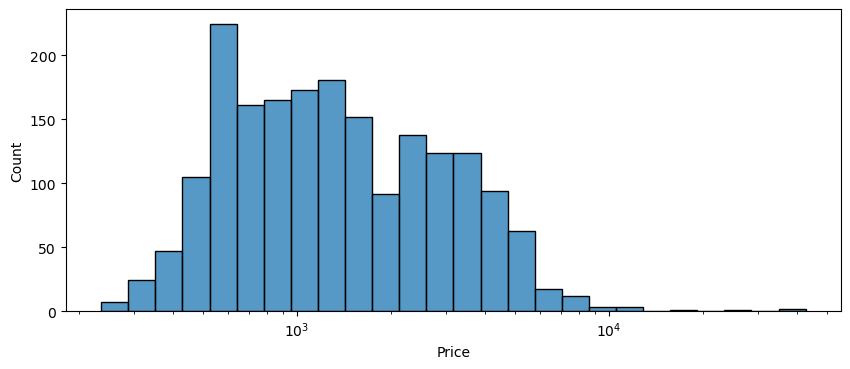

In [85]:
sns.histplot(books, x="Price", log_scale=True);

In [86]:
books.loc[:, "Price"] = np.log(books["Price"])

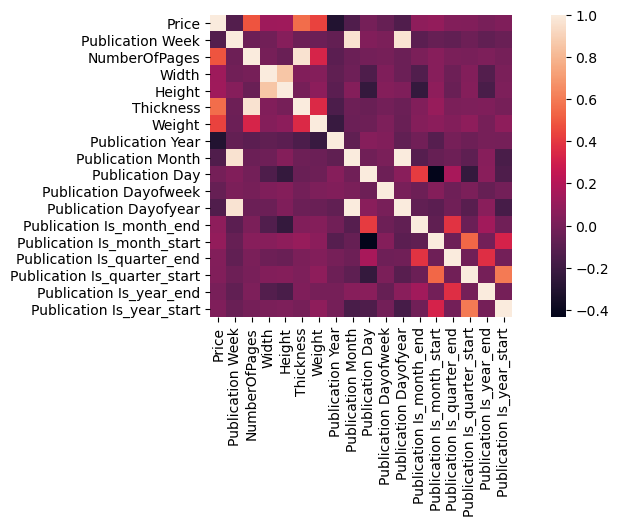

In [87]:
sns.heatmap(books.corr(), square=True);

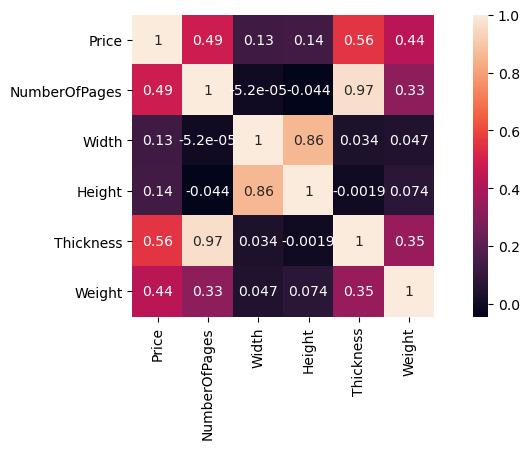

In [88]:
num_var = ["Price", "NumberOfPages", "Width", "Height", "Thickness", "Weight"]
sns.heatmap(books.loc[:,num_var].corr(), square=True, annot=True);

**Format**

In [89]:
books["Format"].value_counts()

Paperback    1422
Hardback      492
Name: Format, dtype: int64

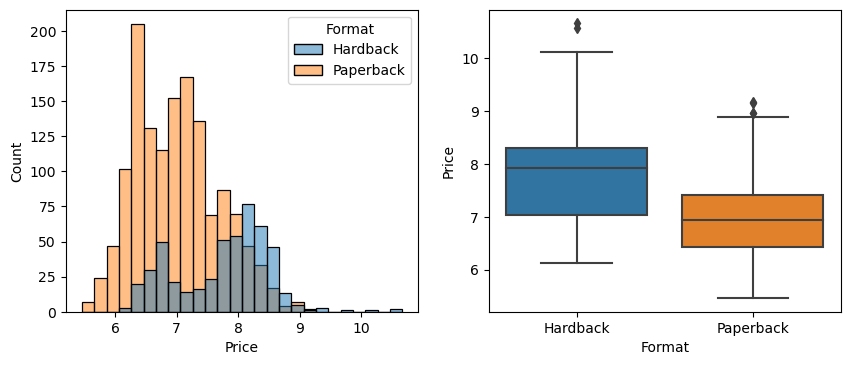

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.histplot(data=books, x="Price", hue="Format", ax=ax[0])
sns.boxplot(data=books, x="Format", y="Price", ax=ax[1]);

In [91]:
books["Publisher"].value_counts()[:10]

Springer                                       398
Independently Published                        342
Packt Publishing Limited                       153
Createspace Independent Publishing Platform     94
LAP Lambert Academic Publishing                 76
Taylor & Francis                                64
aPress                                          57
Wiley                                           56
Charlie Creative Lab                            31
O'Reilly Media, Inc, USA                        28
Name: Publisher, dtype: int64

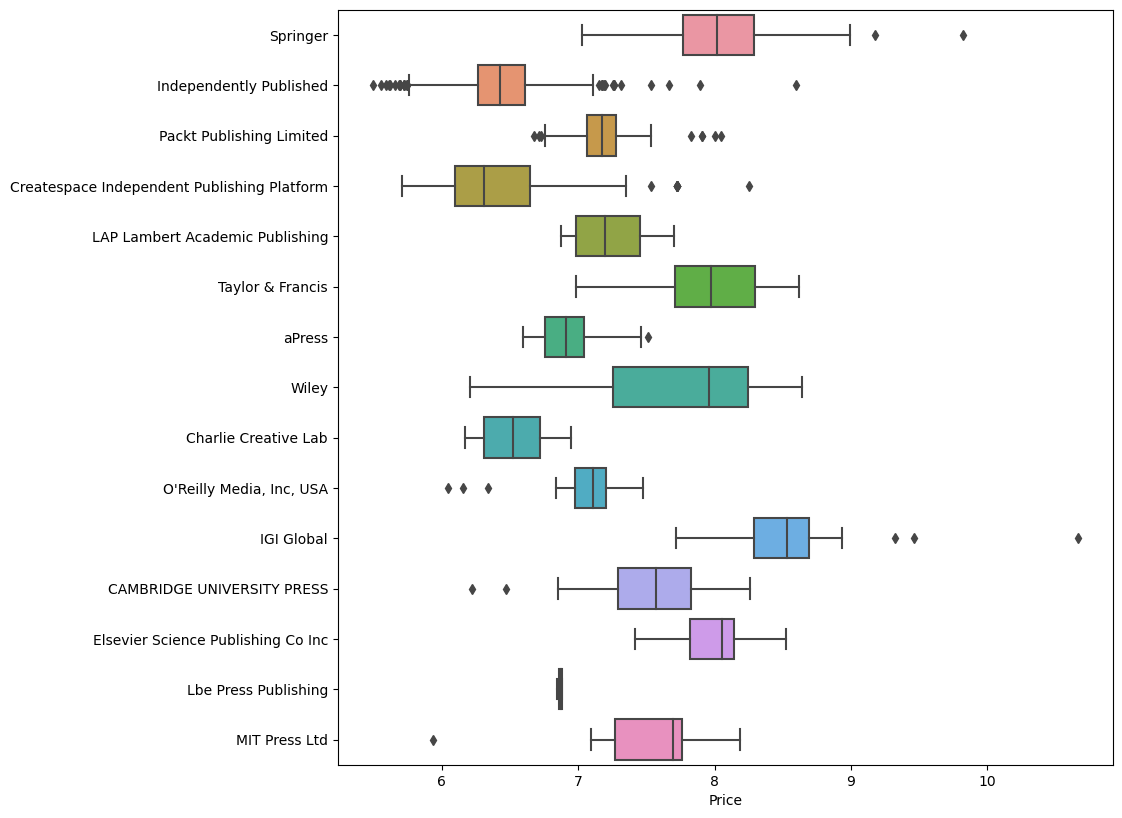

In [92]:
pname = books["Publisher"].value_counts()[:15].index
plt.figure(figsize=(10, 10))
sns.boxplot(data=books, y='Publisher', x="Price", order=pname)
plt.ylabel("");

In [93]:
books["Language"].value_counts()

English            1869
German               17
Spanish              16
French                2
Portuguese            2
English, German       1
Name: Language, dtype: int64

In [94]:
books[books["Language"] == "English, German"]

,Name,Authors,Price,Publication Week,NumberOfPages,Format,Publisher,Language,Publication City,Publication Country,...,Publication Day,Publication Dayofweek,Publication Dayofyear,Publication Is_month_end,Publication Is_month_start,Publication Is_quarter_end,Publication Is_quarter_start,Publication Is_year_end,Publication Is_year_start,Publication Elapsed
1296,Susanne Huth - Analog Algorithm - Landscapes of Machine Learning,"Maren Lubbke-tidow, Susanne Huth",6.767343,33,80.0,Paperback,Fotohof,"English, German",Salzburg,Austria,...,13,3,226,False,False,False,False,False,False,1597276800


In [95]:
books.loc[1494, "Language"] = "German"

In [96]:
books["Language"].value_counts()

English            1868
German               18
Spanish              16
French                2
Portuguese            2
English, German       1
Name: Language, dtype: int64

In [97]:
books["Publication Country"].value_counts()

United States     337
United Kingdom    259
Switzerland       218
Germany            83
Singapore          59
Netherlands        16
Canada              5
India               4
Austria             1
Name: Publication Country, dtype: int64

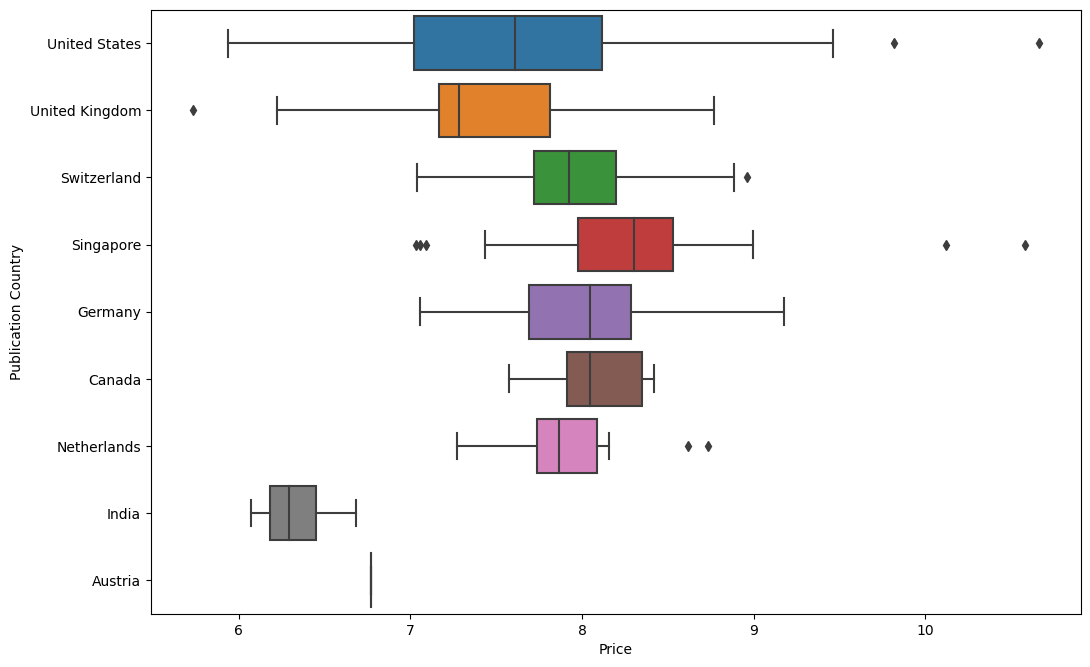

In [98]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Price", y="Publication Country", data=books);

In [23]:
books["Publication City"].unique()

array(['New York, NY', 'Cambridge', 'New York', nan, 'Cham', 'Bosa Roca',
       'Portland', 'London', 'OH', 'Washington', 'San Diego',
       'New Jersey', 'Singapore', 'Bristol', 'Hoboken', 'Oxford',
       'Bingley', 'Berlin', 'England', 'Hershey', 'Oakville',
       'San Rafael', 'Dordrecht', 'Stevenage', 'Chicago, IL', 'Maryland',
       'Harrisburg, PA', 'Norwood', 'Boca Raton, FL', 'Morrisville',
       'Philadelphia', 'Lanham, MD', 'Annopolis', 'Pennsauken', 'Bern',
       'Sebastopol', 'Birmingham', 'Boston', 'Shelter Island, N.Y.',
       'San Francisco', 'Berkley', 'Farnham', 'Raleigh', 'Preston',
       'Bradley Beach', 'Chichester, England', 'Hanover', 'New Delhi',
       'Sim Valley, CA', 'Weisbaden', 'Saarbrucken', 'Santa Monica, CA',
       'Salzburg', 'Rockland, MA', 'Houston', 'San Rafael, CA',
       '[Bellevue, Washington]'], dtype=object)

In [24]:
books["Publication City"].replace("New York", "New York, NY", inplace=True)

In [25]:
city_name = books["Publication City"].value_counts()[:20].index
city_name

Index(['Cham', 'Birmingham', 'New York, NY', 'Berlin', 'Singapore', 'London',
       'Berkley', 'Cambridge', 'Sebastopol', 'Hershey', 'San Diego',
       'Dordrecht', 'Hoboken', 'San Rafael', 'Hanover', 'England', 'Bosa Roca',
       'Boston', 'Portland', 'Saarbrucken'],
      dtype='object')

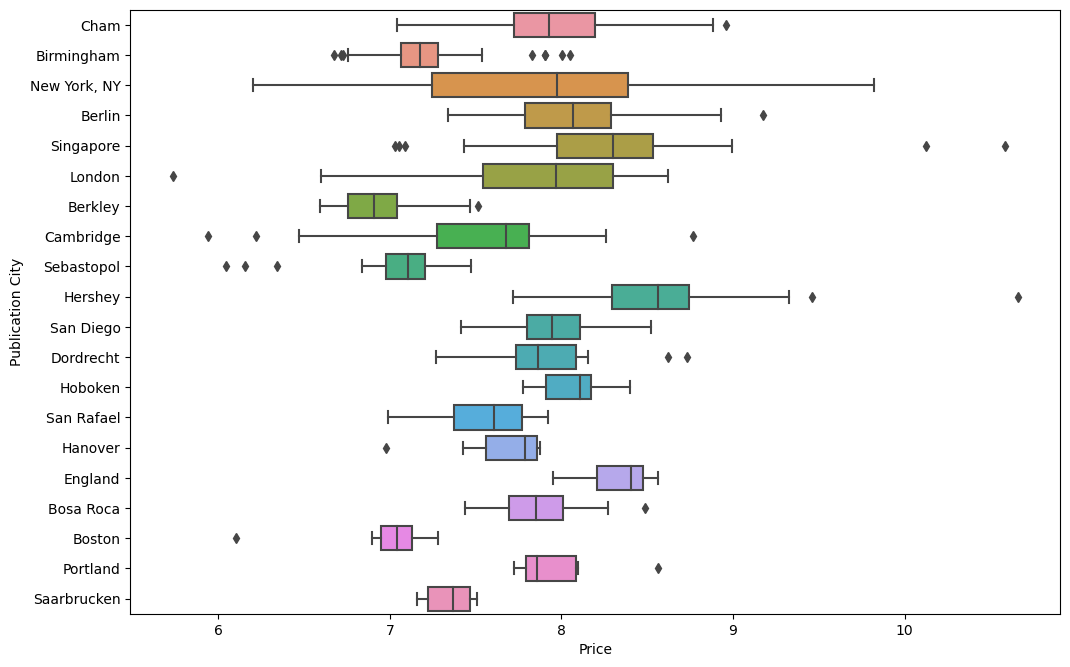

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Price", y="Publication City", data=books, order=city_name);

___

In [27]:
median_impute_var = ["NumberOfPages", "Width", "Height", "Thickness", "Weight"]
books.loc[:, median_impute_var] = books[median_impute_var].fillna(books[median_impute_var].median())

In [28]:
books.loc[:, "Language"] = books["Language"].fillna("English")

In [29]:
unknown_impute = ["Publication City", "Publication Country"]
books.loc[:, unknown_impute] = books.loc[:,unknown_impute].fillna("unknown")

In [30]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1914 non-null   object 
 1   Authors                       1914 non-null   object 
 2   Price                         1914 non-null   float64
 3   Publication Week              1914 non-null   UInt32 
 4   NumberOfPages                 1914 non-null   float64
 5   Format                        1914 non-null   object 
 6   Publisher                     1914 non-null   object 
 7   Language                      1914 non-null   object 
 8   Publication City              1914 non-null   object 
 9   Publication Country           1914 non-null   object 
 10  Width                         1914 non-null   float64
 11  Height                        1914 non-null   float64
 12  Thickness                     1914 non-null   float64
 13  Wei

In [31]:
books.drop(["Name", "Authors"], axis=1, inplace=True)

In [32]:
proc = [Categorify, Normalize]

In [33]:
dep_var = "Price"

In [34]:
cont, cat = cont_cat_split(books, max_card=2,dep_var=dep_var)

In [35]:
train_size = int(len(books)*0.8)
splits = RandomSplitter()(books.index)

In [36]:
to = TabularPandas(books, proc, cat, cont, y_names=dep_var, splits=splits)

In [37]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

___

In [38]:
def r_mse(inp, tar):return np.sqrt(np.mean((inp-tar)**2))

In [39]:
r_mse(y.mean(), valid_y)

0.730240893397608

In [40]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(xs, y)
r_mse(linear_reg.predict(valid_xs), valid_y)

0.47712674162988866

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(xs, y)
r_mse(knn.predict(valid_xs), valid_y)

0.5310868966540578

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(oob_score=True)
rf.fit(xs, y);

In [43]:
y_pred = rf.predict(valid_xs)

In [44]:
r_mse(y_pred, valid_y)

0.34763051907219245

In [45]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                               ).sort_values('imp', ascending=False)

In [46]:
fi = rf_feat_importance(rf, xs)
fi[:10]

,cols,imp
4,Publication City,0.456663
17,Weight,0.084466
5,Publication Country,0.081780
1,Format,0.081457
2,Publisher,0.069195
13,NumberOfPages,0.056153
12,Publication Elapsed,0.046021
14,Width,0.022458
16,Thickness,0.017650
20,Publication Day,0.017053


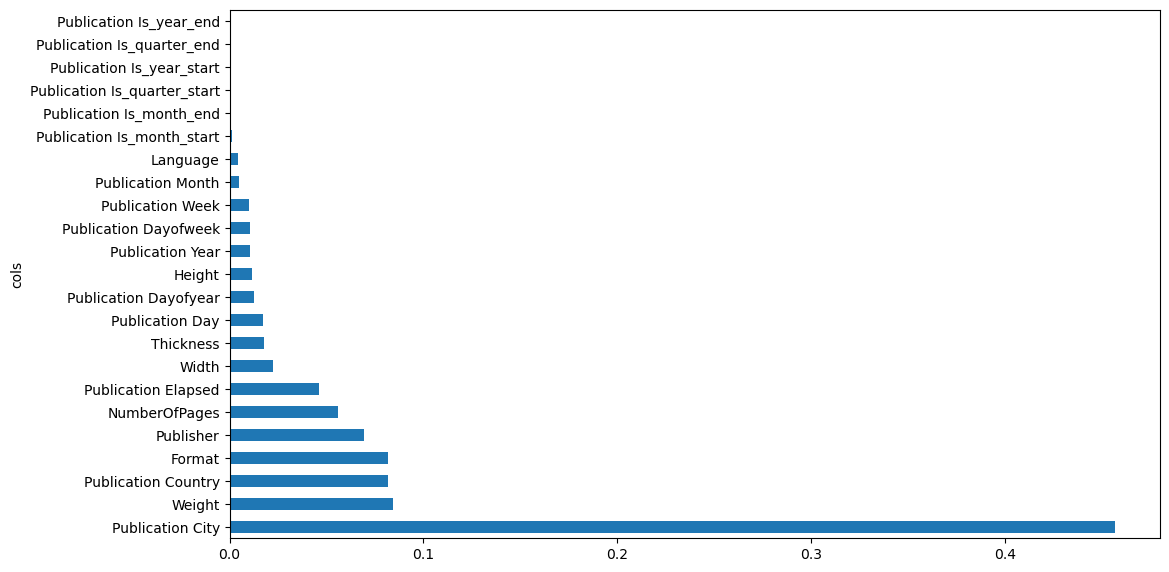

In [47]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [48]:
to_keep = fi[fi.imp>0.005].cols

In [49]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [50]:
rf_re = RandomForestRegressor().fit(xs_imp, y)
r_mse(rf_re.predict(valid_xs_imp), valid_y)

0.3492943280155454

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
rf = RandomForestRegressor(n_jobs=-1)
params_range  = {'n_estimators':np.arange(100, 1000),
                 'max_depth':np.arange(5, 50),
                 'min_samples_leaf':np.arange(1, 100),
                 'max_features':["sqrt", "log2", 0,5]}
rscv = RandomizedSearchCV(rf, params_range, random_state=42, n_jobs=-1, n_iter=100)
rscv.fit(xs_imp, y)

KeyboardInterrupt: 

In [ ]:
rscv.best_estimator_

In [ ]:
r_mse(rscv.best_estimator_.predict(valid_xs_imp), valid_y)

In [106]:
dls = to.dataloaders(16)

In [107]:
to.train.y.min(), to.train.y.max()

(5.463831901550293, 10.661181449890137)

In [108]:
learn = tabular_learner(dls, y_range=(5,11), layers=[50, 25],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=1.0964781722577754e-06)

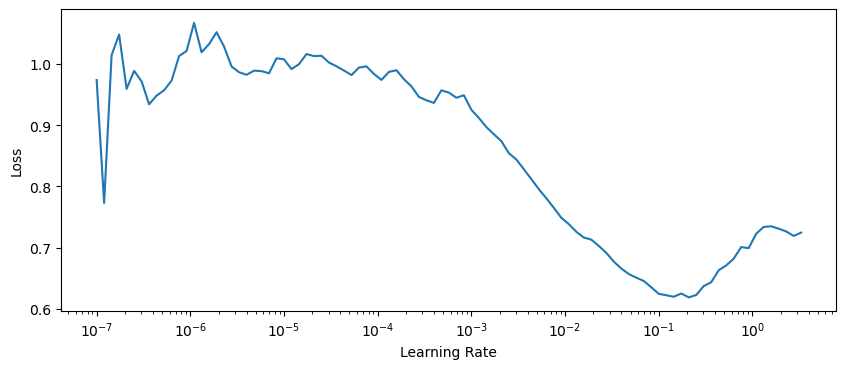

In [109]:
learn.lr_find()

In [110]:
learn.fit_one_cycle(8, 1e-2)

epoch,train_loss,valid_loss,time
0,0.275825,0.159976,00:01
1,0.184857,0.208575,00:01
2,0.154294,0.145593,00:01
3,0.114890,0.115950,00:01
4,0.088699,0.112143,00:01
5,0.068309,0.109031,00:01
6,0.053267,0.101473,00:01
7,0.048320,0.103385,00:01


In [111]:
preds, targs = learn.get_preds()

In [112]:
np.sqrt(torch.mean((preds - targs) ** 2))

tensor(0.3215)